In [8]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from benfordslaw import benfordslaw

In [10]:
#Initialize
bl = benfordslaw(alpha=0.5)

In [4]:
df = pd.read_csv('caso_full.csv', sep=',')

[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=12337.6


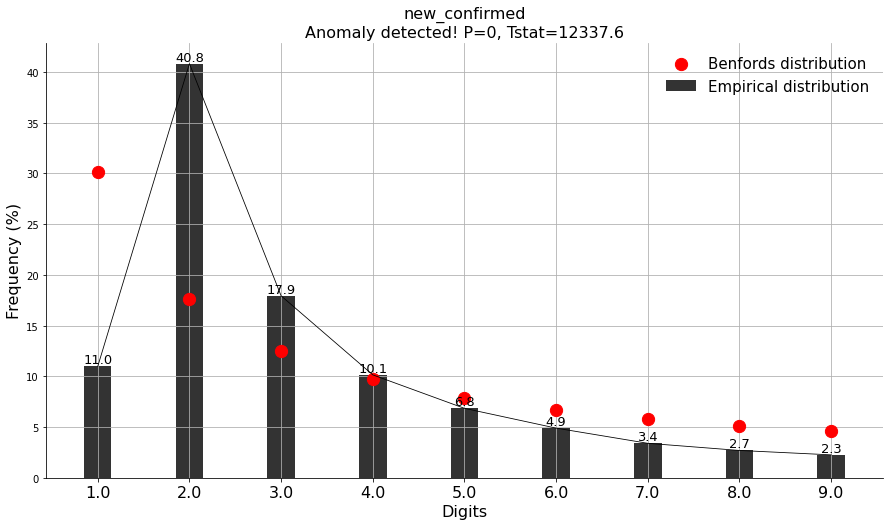

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'new_confirmed\nAnomaly detected! P=0, Tstat=12337.6'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [11]:
X = df['new_deaths'].values

result = bl.fit(X)

bl.plot(title='new_confirmed')

In [21]:
df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0,0,3,city,SP,0,0


In [22]:
#Delete city isnull
df_no_city_null = df
df_no_city_null.drop(df_no_city_null[df_no_city_null.city.isnull()].index,inplace=True)
df_no_city_null.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0,0,1,city,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0,0,2,city,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0,0,3,city,SP,0,0
6,São Paulo,3550308.0,2020-02-28,9,12325232.0,12252023.0,False,False,2,0.01623,2020-02-28,0.0,0,4,city,SP,1,0
8,São Paulo,3550308.0,2020-02-29,9,12325232.0,12252023.0,False,False,2,0.01623,2020-02-29,0.0,0,5,city,SP,0,0


In [15]:
dfCor = df_no_city_null.corr()
outcomeCor = abs(dfCor['new_confirmed'])
outcomeCor

KeyError: 'state'

<AxesSubplot:>

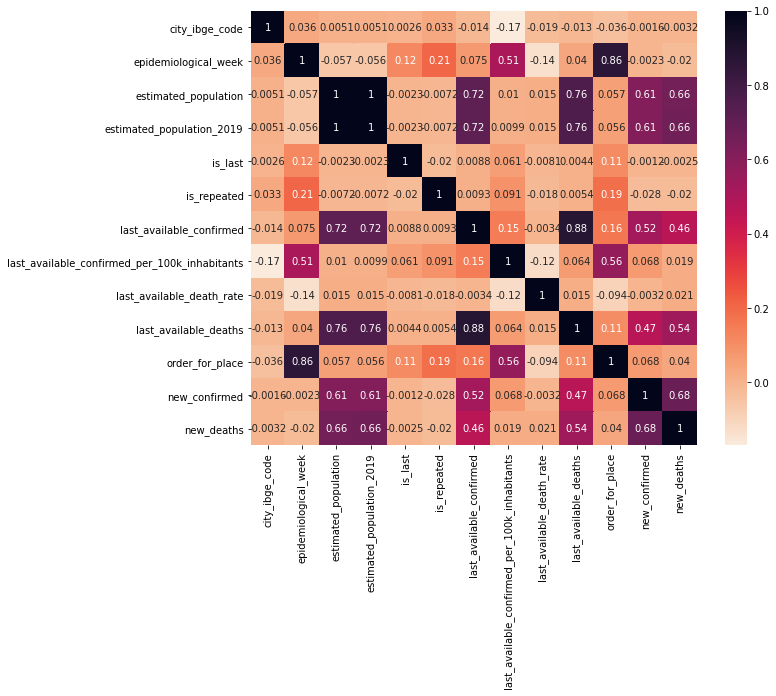

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(dfCor,cmap='rocket_r',annot=True)

In [25]:
df_aux = df_no_city_null

df_tmp = []

for state in df_aux['state'].unique():
    Iloc = df_aux['state']==state
    for date in df_aux['date'].loc[Iloc].unique():
        new_confirmed_aux = df_aux['new_confirmed'].loc[df_aux['date']==date].sum()
        new_deaths_aux = df_aux['new_deaths'].loc[df_aux['date']==date].sum()
        df_tmp.append([state, date, new_confirmed_aux, new_deaths_aux])

In [27]:
df_new = pd.DataFrame(data = df_tmp, 
                      columns = ['state', 'date', 'new_confirmed', 'new_deaths'])

In [29]:
df_new.head(100)

,state,date,new_confirmed,new_deaths
0,SP,2020-02-25,1,0
1,SP,2020-02-26,0,0
2,SP,2020-02-27,0,0
3,SP,2020-02-28,1,0
4,SP,2020-02-29,0,0
...,...,...,...,...
95,SP,2020-05-30,32329,891
96,SP,2020-05-31,13181,472
97,SP,2020-06-01,14961,738
98,SP,2020-06-02,31907,1368


In [30]:
df_new.to_csv('caso_full_new.csv')

[benfordslaw] >[chi2] Anomaly detected! P=5.70677e-277, Tstat=1307.47


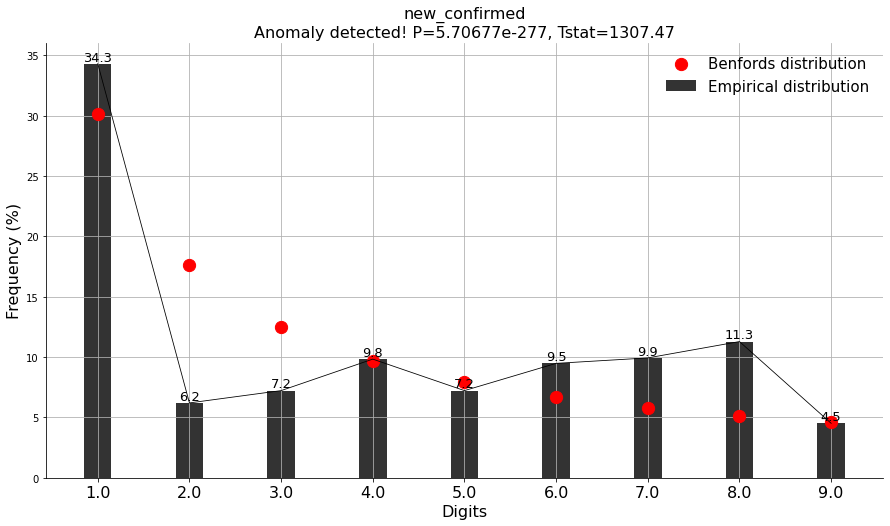

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'new_confirmed\nAnomaly detected! P=5.70677e-277, Tstat=1307.47'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [39]:
X = df_new['new_deaths'].values

result = bl.fit(X)

bl.plot(title='new_confirmed')